In [1]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


2.4.0+cu118
0.16.2


In [2]:
import timm


all_densenet_models = timm.list_models('*resnet*', pretrained=True)
display(all_densenet_models)

['cspresnet50.ra_in1k',
 'eca_resnet33ts.ra2_in1k',
 'ecaresnet26t.ra2_in1k',
 'ecaresnet50d.miil_in1k',
 'ecaresnet50d_pruned.miil_in1k',
 'ecaresnet50t.a1_in1k',
 'ecaresnet50t.a2_in1k',
 'ecaresnet50t.a3_in1k',
 'ecaresnet50t.ra2_in1k',
 'ecaresnet101d.miil_in1k',
 'ecaresnet101d_pruned.miil_in1k',
 'ecaresnet269d.ra2_in1k',
 'ecaresnetlight.miil_in1k',
 'gcresnet33ts.ra2_in1k',
 'gcresnet50t.ra2_in1k',
 'inception_resnet_v2.tf_ens_adv_in1k',
 'inception_resnet_v2.tf_in1k',
 'lambda_resnet26rpt_256.c1_in1k',
 'lambda_resnet26t.c1_in1k',
 'lambda_resnet50ts.a1h_in1k',
 'legacy_seresnet18.in1k',
 'legacy_seresnet34.in1k',
 'legacy_seresnet50.in1k',
 'legacy_seresnet101.in1k',
 'legacy_seresnet152.in1k',
 'nf_resnet50.ra2_in1k',
 'resnet10t.c3_in1k',
 'resnet14t.c3_in1k',
 'resnet18.a1_in1k',
 'resnet18.a2_in1k',
 'resnet18.a3_in1k',
 'resnet18.fb_ssl_yfcc100m_ft_in1k',
 'resnet18.fb_swsl_ig1b_ft_in1k',
 'resnet18.gluon_in1k',
 'resnet18.tv_in1k',
 'resnet18d.ra2_in1k',
 'resnet26.bt_i

In [35]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', None, 'Blue', 'Red', None],
    'Size': [10, 15, None, 14, 13, 10, None, 12],
    'Price': [100, None, 150, 125, None, 110, 130, None]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

numerical_features = ['Size', 'Price']
categorical_features = ['Color']

# Imputer for nume
numerical_transformer = SimpleImputer(strategy='median')
# Imputer for cat
categorical_transformer = SimpleImputer(strategy='most_frequent', missing_values=None)

# apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply
df_transformed = preprocessor.fit_transform(df)

# Convert the transformed array back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=numerical_features + categorical_features)

print("\nDataFrame after imputation:")
print(df_transformed)

Original DataFrame:
   Color  Size  Price
0    Red  10.0  100.0
1   Blue  15.0    NaN
2  Green   NaN  150.0
3    Red  14.0  125.0
4   None  13.0    NaN
5   Blue  10.0  110.0
6    Red   NaN  130.0
7   None  12.0    NaN

DataFrame after imputation:
   Size  Price  Color
0  10.0  100.0    Red
1  15.0  125.0   Blue
2  12.5  150.0  Green
3  14.0  125.0    Red
4  13.0  125.0    Red
5  10.0  110.0   Blue
6  12.5  130.0    Red
7  12.0  125.0    Red


In [33]:
import pandas as pd
from scipy.stats import mode

# Sample data
data = {'A': [1, 2, 2, None, 2, 3, 4, 4, 5],
        'B': ['red', 'blue', None, 'blue', 'red', 'red', 'red', 'green', 'blue']}

df = pd.DataFrame(data)

# Function to apply mode imputation
def mode_imputation(df):
    for column in df.columns:
        # Calculate the mode of the column
        most_frequent = mode(df[column]).mode[0]
        # Replace missing values with the mode
        df[column].fillna(most_frequent, inplace=True)
    return df

# Apply mode imputation to the dataframe
imputed_df = mode_imputation(df)

print(imputed_df)


IndexError: invalid index to scalar variable.

In [31]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', None, 'Blue', 'Red', None]
}
df = pd.DataFrame(data)

# Display the original data
print("Original DataFrame:")
print(df)

# Initialize the SimpleImputer with strategy='most_frequent' for mode imputation
imputer = SimpleImputer(strategy='most_frequent')

# Perform mode imputation on the 'Color' column
df['Color'] = imputer.fit_transform(df[['Color']])

# Display the DataFrame after mode imputation
print("\nDataFrame after mode imputation:")
print(df)


Original DataFrame:
   Color
0    Red
1   Blue
2  Green
3    Red
4   None
5   Blue
6    Red
7   None


ValueError: 2

In [ ]:
aa = ['就寝', '起床']
for elem in aa:
    if elem in '起床就　寝aa':
        print(11)

11


In [6]:
from urllib.request import urlopen
from PIL import Image
import timm

img = Image.open(urlopen(
    'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
))

model = timm.create_model(
    'resnet18.a1_in1k',
    # "efficientnet_b0.ra_in1k",
    pretrained=True,
    features_only=True,
)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

output = model(transforms(img).unsqueeze(0))  # unsqueeze single image into batch of 1

for o in output:
    # print shape of each feature map in output
    # e.g.:
    #  torch.Size([1, 64, 112, 112])
    #  torch.Size([1, 64, 56, 56])
    #  torch.Size([1, 128, 28, 28])
    #  torch.Size([1, 256, 14, 14])
    #  torch.Size([1, 512, 7, 7])

    print(o.shape)

torch.Size([1000])


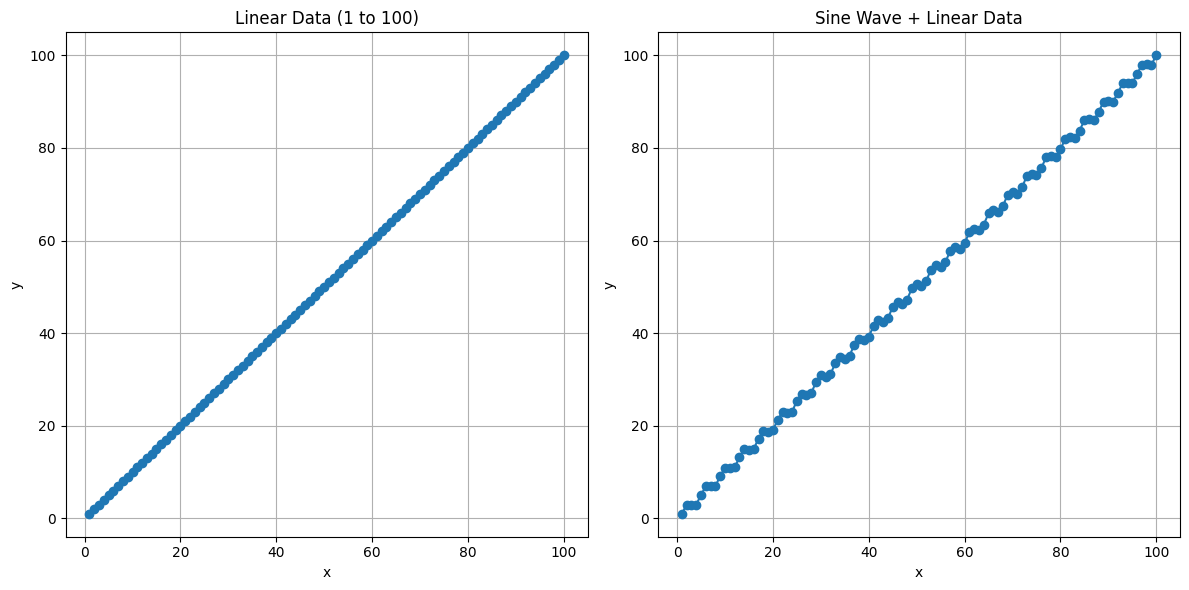

Linear Data (1 to 100):
Pearson Correlation Coefficient: 1.00
Spearman's Rank Correlation: 1.00

Sine Wave + Linear Data:
Pearson Correlation Coefficient: 1.00
Spearman's Rank Correlation: 1.00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Generate data
x = np.arange(1, 101)  # Simple increasing sequence: 1 to 100
y_linear = x  # Linear relationship

# Generate a sine wave added to the linearly increasing sequence
y_sin_wave = np.sin(np.linspace(0, 50 * np.pi, 100)) + x  # Sine wave with increasing trend

# Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y_linear, 'o-', label='Linear (1 to 100)')
plt.title("Linear Data (1 to 100)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, y_sin_wave, 'o-', label='Sine Wave + Linear')
plt.title("Sine Wave + Linear Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate Pearson and Spearman correlations
pearson_corr_linear, _ = pearsonr(x, y_linear)
spearman_corr_linear, _ = spearmanr(x, y_linear)

pearson_corr_sin_wave, _ = pearsonr(x, y_sin_wave)
spearman_corr_sin_wave, _ = spearmanr(x, y_sin_wave)

print("Linear Data (1 to 100):")
print(f"Pearson Correlation Coefficient: {pearson_corr_linear:.2f}")
print(f"Spearman's Rank Correlation: {spearman_corr_linear:.2f}")
print()

print("Sine Wave + Linear Data:")
print(f"Pearson Correlation Coefficient: {pearson_corr_sin_wave:.2f}")
print(f"Spearman's Rank Correlation: {spearman_corr_sin_wave:.2f}")


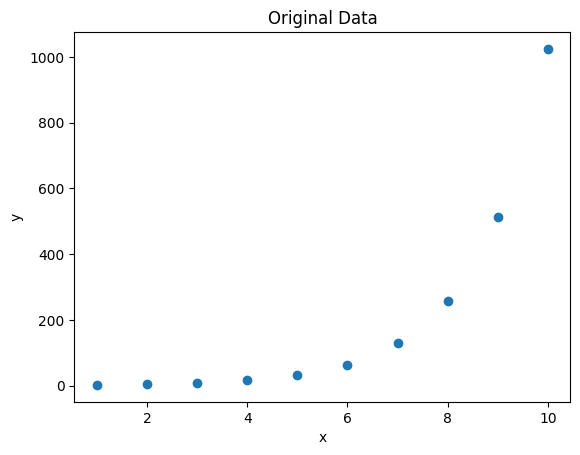

Pearson Correlation Coefficient (log-transformed): 0.80
P-value: 0.00
Spearman's Rank Correlation: 1.00
P-value: 0.00


In [7]:
from scipy.stats import spearmanr

# Example data: x vs. y (non-linear, monotonic relationship)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

# Plot the data
plt.scatter(x, y)
plt.title("Original Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Calculate Correlation
correlation_coefficient, p_value = pearsonr(x, y)
spearman_corr, p_value = spearmanr(x, y)


print(f"Pearson Correlation Coefficient (log-transformed): {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

print(f"Spearman's Rank Correlation: {spearman_corr:.2f}")
print(f"P-value: {p_value:.2f}")


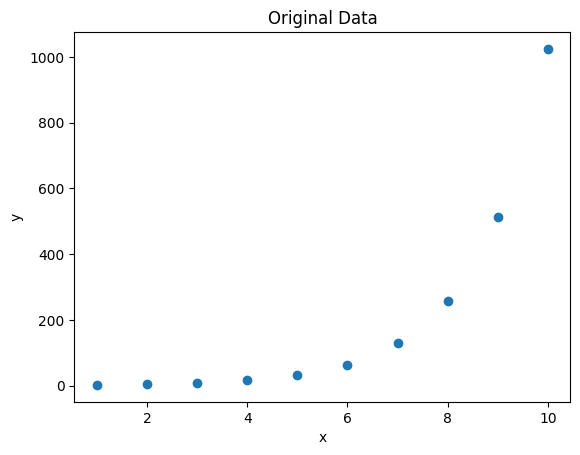

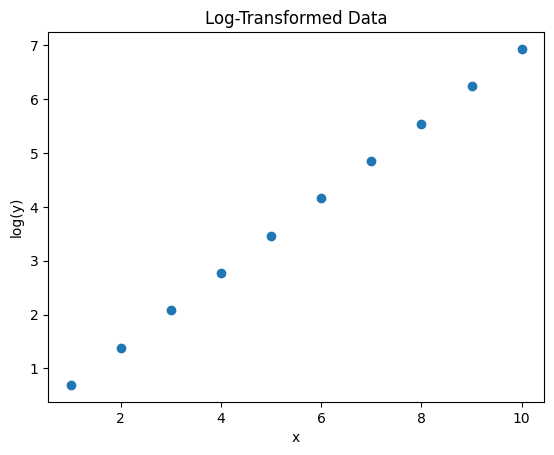

Pearson Correlation Coefficient (log-transformed): 0.80
P-value: 0.01


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Example data: x vs. y (non-linear relationship)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

# Original data plot
plt.scatter(x, y)
plt.title("Original Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Apply a logarithmic transformation to y
log_y = np.log(y)

# Transformed data plot
plt.scatter(x, log_y)
plt.title("Log-Transformed Data")
plt.xlabel("x")
plt.ylabel("log(y)")
plt.show()

# Calculate Pearson Correlation on transformed data
correlation_coefficient, p_value = pearsonr(x, y)

print(f"Pearson Correlation Coefficient (log-transformed): {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")


In [2]:
a = (1,2,3)

def funca():
    return a

e,b = funca()
print(e,b)

ValueError: too many values to unpack (expected 2)

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import polars as pl

from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import lightgbm as lgb
import catboost as cb
import xgboost as xgb

import optuna

In [1]:
import numpy as np
from scipy.stats import pearsonr

# Example data: hours studied vs. exam scores
hours_studied = np.array([1, 2, 3, 4, 3.5])
exam_scores = np.array([60, 70, 75, 85, 90])

# Calculate Pearson Correlation Coefficient
correlation_coefficient, p_value = pearsonr(hours_studied, exam_scores)

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")


Pearson Correlation Coefficient: 0.94
P-value: 0.02


KS Statistic: 0.10357070563896065
P-value: 0.21805553378516235
Fail to reject the null hypothesis: The sample follows a normal distribution.


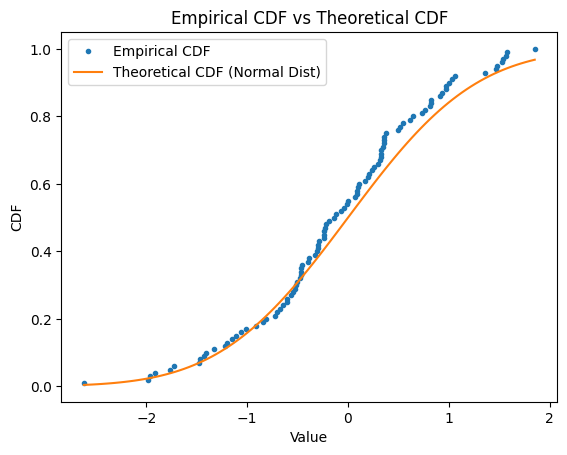

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generate a sample of data
np.random.seed(42)
sample_data = np.random.normal(loc=0, scale=1, size=100)  # A sample from a normal distribution

# Perform the K-S test against a normal distribution
D, p_value = stats.kstest(sample_data, 'norm', args=(0, 1))

print(f"KS Statistic: {D}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The sample does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: The sample follows a normal distribution.")

# Plotting the empirical CDF vs the theoretical CDF
ecdf = np.sort(sample_data)
cdf = np.arange(1, len(ecdf) + 1) / len(ecdf)
plt.plot(ecdf, cdf, marker='.', linestyle='none', label='Empirical CDF')

# Theoretical CDF for the normal distribution
x = np.linspace(min(ecdf), max(ecdf), 100)
plt.plot(x, stats.norm.cdf(x, loc=0, scale=1), label='Theoretical CDF (Normal Dist)')

plt.legend()
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('Empirical CDF vs Theoretical CDF')
plt.show()


In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize individual models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)

# Initialize Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', model1), ('dt', model2), ('svc', model3)],
    voting='soft',
    weights=[0.3, 0.3, 0.3])  # Use 'hard' for hard voting

# Train and predict
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Evaluate accuracy
display(y_test)
display(y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")



array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

Accuracy: 1.0


In [2]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           62Gi       4.9Gi        24Gi       7.0Mi        33Gi        56Gi
Swap:         8.0Gi       298Mi       7.7Gi


In [3]:
root = Path('/kaggle/input/isic-2024-challenge')

train_path = '/root/Development/Kaggle/ISIC2024/data/raw/train-metadata.csv'
test_path = '/root/Development/Kaggle/ISIC2024/data/raw/test-metadata.csv'
subm_path = '/root/Development/Kaggle/ISIC2024/data/raw/sample_submission.csv'

id_col = 'isic_id'
target_col = 'target'
group_col = 'patient_id'

err = 1e-5
sampling_ratio = 0.01
seed = 42

num_cols = [
    'age_approx',                        # Approximate age of patient at time of imaging.
    'clin_size_long_diam_mm',            # Maximum diameter of the lesion (mm).+
    'tbp_lv_A',                          # A inside  lesion.+
    'tbp_lv_Aext',                       # A outside lesion.+
    'tbp_lv_B',                          # B inside  lesion.+
    'tbp_lv_Bext',                       # B outside lesion.+ 
    'tbp_lv_C',                          # Chroma inside  lesion.+
    'tbp_lv_Cext',                       # Chroma outside lesion.+
    'tbp_lv_H',                          # Hue inside the lesion; calculated as the angle of A* and B* in LAB* color space. Typical values range from 25 (red) to 75 (brown).+
    'tbp_lv_Hext',                       # Hue outside lesion.+
    'tbp_lv_L',                          # L inside lesion.+
    'tbp_lv_Lext',                       # L outside lesion.+
    'tbp_lv_areaMM2',                    # Area of lesion (mm^2).+
    'tbp_lv_area_perim_ratio',           # Border jaggedness, the ratio between lesions perimeter and area. Circular lesions will have low values; irregular shaped lesions will have higher values. Values range 0-10.+
    'tbp_lv_color_std_mean',             # Color irregularity, calculated as the variance of colors within the lesion's boundary.
    'tbp_lv_deltaA',                     # Average A contrast (inside vs. outside lesion).+
    'tbp_lv_deltaB',                     # Average B contrast (inside vs. outside lesion).+
    'tbp_lv_deltaL',                     # Average L contrast (inside vs. outside lesion).+
    'tbp_lv_deltaLB',                    #
    'tbp_lv_deltaLBnorm',                # Contrast between the lesion and its immediate surrounding skin. Low contrast lesions tend to be faintly visible such as freckles; high contrast lesions tend to be those with darker pigment. Calculated as the average delta LB of the lesion relative to its immediate background in LAB* color space. Typical values range from 5.5 to 25.+
    'tbp_lv_eccentricity',               # Eccentricity.+
    'tbp_lv_minorAxisMM',                # Smallest lesion diameter (mm).+
    'tbp_lv_nevi_confidence',            # Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus. The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist.+,++
    'tbp_lv_norm_border',                # Border irregularity (0-10 scale); the normalized average of border jaggedness and asymmetry.+
    'tbp_lv_norm_color',                 # Color variation (0-10 scale); the normalized average of color asymmetry and color irregularity.+
    'tbp_lv_perimeterMM',                # Perimeter of lesion (mm).+
    'tbp_lv_radial_color_std_max',       # Color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. This score is calculated by looking at the average standard deviation in LAB* color space within concentric rings originating from the lesion center. Values range 0-10.+
    'tbp_lv_stdL',                       # Standard deviation of L inside  lesion.+
    'tbp_lv_stdLExt',                    # Standard deviation of L outside lesion.+
    'tbp_lv_symm_2axis',                 # Border asymmetry; a measure of asymmetry of the lesion's contour about an axis perpendicular to the lesion's most symmetric axis. Lesions with two axes of symmetry will therefore have low scores (more symmetric), while lesions with only one or zero axes of symmetry will have higher scores (less symmetric). This score is calculated by comparing opposite halves of the lesion contour over many degrees of rotation. The angle where the halves are most similar identifies the principal axis of symmetry, while the second axis of symmetry is perpendicular to the principal axis. Border asymmetry is reported as the asymmetry value about this second axis. Values range 0-10.+
    'tbp_lv_symm_2axis_angle',           # Lesion border asymmetry angle.+
    'tbp_lv_x',                          # X-coordinate of the lesion on 3D TBP.+
    'tbp_lv_y',                          # Y-coordinate of the lesion on 3D TBP.+
    'tbp_lv_z',                          # Z-coordinate of the lesion on 3D TBP.+
]

new_num_cols = [
    'lesion_size_ratio',             # tbp_lv_minorAxisMM      / clin_size_long_diam_mm
    'lesion_shape_index',            # tbp_lv_areaMM2          / tbp_lv_perimeterMM **2
    'hue_contrast',                  # tbp_lv_H                - tbp_lv_Hext              abs
    'luminance_contrast',            # tbp_lv_L                - tbp_lv_Lext              abs
    'lesion_color_difference',       # tbp_lv_deltaA **2       + tbp_lv_deltaB **2 + tbp_lv_deltaL **2  sqrt  
    'border_complexity',             # tbp_lv_norm_border      + tbp_lv_symm_2axis
    'color_uniformity',              # tbp_lv_color_std_mean   / tbp_lv_radial_color_std_max

    'position_distance_3d',          # tbp_lv_x **2 + tbp_lv_y **2 + tbp_lv_z **2  sqrt
    'perimeter_to_area_ratio',       # tbp_lv_perimeterMM      / tbp_lv_areaMM2
    'area_to_perimeter_ratio',       # tbp_lv_areaMM2          / tbp_lv_perimeterMM
    'lesion_visibility_score',       # tbp_lv_deltaLBnorm      + tbp_lv_norm_color
    'symmetry_border_consistency',   # tbp_lv_symm_2axis       * tbp_lv_norm_border
    'consistency_symmetry_border',   # tbp_lv_symm_2axis       * tbp_lv_norm_border / (tbp_lv_symm_2axis + tbp_lv_norm_border)

    'color_consistency',             # tbp_lv_stdL             / tbp_lv_Lext
    'consistency_color',             # tbp_lv_stdL*tbp_lv_Lext / tbp_lv_stdL + tbp_lv_Lext
    'size_age_interaction',          # clin_size_long_diam_mm  * age_approx
    'hue_color_std_interaction',     # tbp_lv_H                * tbp_lv_color_std_mean
    'lesion_severity_index',         # tbp_lv_norm_border      + tbp_lv_norm_color + tbp_lv_eccentricity / 3
    'shape_complexity_index',        # border_complexity       + lesion_shape_index
    'color_contrast_index',          # tbp_lv_deltaA + tbp_lv_deltaB + tbp_lv_deltaL + tbp_lv_deltaLBnorm

    'log_lesion_area',               # tbp_lv_areaMM2          + 1  np.log
    'normalized_lesion_size',        # clin_size_long_diam_mm  / age_approx
    'mean_hue_difference',           # tbp_lv_H                + tbp_lv_Hext    / 2
    'std_dev_contrast',              # tbp_lv_deltaA **2 + tbp_lv_deltaB **2 + tbp_lv_deltaL **2   / 3  np.sqrt
    'color_shape_composite_index',   # tbp_lv_color_std_mean   + bp_lv_area_perim_ratio + tbp_lv_symm_2axis   / 3
    'lesion_orientation_3d',         # tbp_lv_y                , tbp_lv_x  np.arctan2
    'overall_color_difference',      # tbp_lv_deltaA           + tbp_lv_deltaB + tbp_lv_deltaL   / 3

    'symmetry_perimeter_interaction',# tbp_lv_symm_2axis       * tbp_lv_perimeterMM
    'comprehensive_lesion_index',    # tbp_lv_area_perim_ratio + tbp_lv_eccentricity + bp_lv_norm_color + tbp_lv_symm_2axis   / 4
    'color_variance_ratio',          # tbp_lv_color_std_mean   / tbp_lv_stdLExt
    'border_color_interaction',      # tbp_lv_norm_border      * tbp_lv_norm_color
    'border_color_interaction_2',
    'size_color_contrast_ratio',     # clin_size_long_diam_mm  / tbp_lv_deltaLBnorm
    'age_normalized_nevi_confidence',# tbp_lv_nevi_confidence  / age_approx
    'age_normalized_nevi_confidence_2',
    'color_asymmetry_index',         # tbp_lv_symm_2axis       * tbp_lv_radial_color_std_max

    'volume_approximation_3d',       # tbp_lv_areaMM2          * sqrt(tbp_lv_x**2 + tbp_lv_y**2 + tbp_lv_z**2)
    'color_range',                   # abs(tbp_lv_L - tbp_lv_Lext) + abs(tbp_lv_A - tbp_lv_Aext) + abs(tbp_lv_B - tbp_lv_Bext)
    'shape_color_consistency',       # tbp_lv_eccentricity     * tbp_lv_color_std_mean
    'border_length_ratio',           # tbp_lv_perimeterMM      / pi * sqrt(tbp_lv_areaMM2 / pi)
    'age_size_symmetry_index',       # age_approx              * clin_size_long_diam_mm * tbp_lv_symm_2axis
    'index_age_size_symmetry',       # age_approx              * tbp_lv_areaMM2 * tbp_lv_symm_2axis
]

cat_cols = ['sex', 'anatom_site_general', 'tbp_tile_type', 'tbp_lv_location', 'tbp_lv_location_simple', 'attribution']
norm_cols = [f'{col}_patient_norm' for col in num_cols + new_num_cols]
special_cols = ['count_per_patient']
feature_cols = num_cols + new_num_cols + cat_cols + norm_cols + special_cols

In [4]:
def read_data(path):
    return (
        # pl.read_csv(path, n_rows=10000)
        pl.read_csv(path)
        .with_columns(
            pl.col('age_approx').cast(pl.String).replace('NA', np.nan).cast(pl.Float64),
        )
        .with_columns(
            pl.col(pl.Float64).fill_nan(pl.col(pl.Float64).median()), # You may want to impute test data with train
        )
        .with_columns(
            lesion_size_ratio              = pl.col('tbp_lv_minorAxisMM') / pl.col('clin_size_long_diam_mm'),
            lesion_shape_index             = pl.col('tbp_lv_areaMM2') / (pl.col('tbp_lv_perimeterMM') ** 2),
            hue_contrast                   = (pl.col('tbp_lv_H') - pl.col('tbp_lv_Hext')).abs(),
            luminance_contrast             = (pl.col('tbp_lv_L') - pl.col('tbp_lv_Lext')).abs(),
            lesion_color_difference        = (pl.col('tbp_lv_deltaA') ** 2 + pl.col('tbp_lv_deltaB') ** 2 + pl.col('tbp_lv_deltaL') ** 2).sqrt(),
            border_complexity              = pl.col('tbp_lv_norm_border') + pl.col('tbp_lv_symm_2axis'),
            color_uniformity               = pl.col('tbp_lv_color_std_mean') / (pl.col('tbp_lv_radial_color_std_max') + err),
        )
        .with_columns(
            position_distance_3d           = (pl.col('tbp_lv_x') ** 2 + pl.col('tbp_lv_y') ** 2 + pl.col('tbp_lv_z') ** 2).sqrt(),
            perimeter_to_area_ratio        = pl.col('tbp_lv_perimeterMM') / pl.col('tbp_lv_areaMM2'),
            area_to_perimeter_ratio        = pl.col('tbp_lv_areaMM2') / pl.col('tbp_lv_perimeterMM'),
            lesion_visibility_score        = pl.col('tbp_lv_deltaLBnorm') + pl.col('tbp_lv_norm_color'),
            combined_anatomical_site       = pl.col('anatom_site_general') + '_' + pl.col('tbp_lv_location'),
            symmetry_border_consistency    = pl.col('tbp_lv_symm_2axis') * pl.col('tbp_lv_norm_border'),
            consistency_symmetry_border    = pl.col('tbp_lv_symm_2axis') * pl.col('tbp_lv_norm_border') / (pl.col('tbp_lv_symm_2axis') + pl.col('tbp_lv_norm_border')),
        )
        .with_columns(
            color_consistency              = pl.col('tbp_lv_stdL') / pl.col('tbp_lv_Lext'),
            consistency_color              = pl.col('tbp_lv_stdL') * pl.col('tbp_lv_Lext') / (pl.col('tbp_lv_stdL') + pl.col('tbp_lv_Lext')),
            size_age_interaction           = pl.col('clin_size_long_diam_mm') * pl.col('age_approx'),
            hue_color_std_interaction      = pl.col('tbp_lv_H') * pl.col('tbp_lv_color_std_mean'),
            lesion_severity_index          = (pl.col('tbp_lv_norm_border') + pl.col('tbp_lv_norm_color') + pl.col('tbp_lv_eccentricity')) / 3,
            shape_complexity_index         = pl.col('border_complexity') + pl.col('lesion_shape_index'),
            color_contrast_index           = pl.col('tbp_lv_deltaA') + pl.col('tbp_lv_deltaB') + pl.col('tbp_lv_deltaL') + pl.col('tbp_lv_deltaLBnorm'),
        )
        .with_columns(
            log_lesion_area                = (pl.col('tbp_lv_areaMM2') + 1).log(),
            normalized_lesion_size         = pl.col('clin_size_long_diam_mm') / pl.col('age_approx'),
            mean_hue_difference            = (pl.col('tbp_lv_H') + pl.col('tbp_lv_Hext')) / 2,
            std_dev_contrast               = ((pl.col('tbp_lv_deltaA') ** 2 + pl.col('tbp_lv_deltaB') ** 2 + pl.col('tbp_lv_deltaL') ** 2) / 3).sqrt(),
            color_shape_composite_index    = (pl.col('tbp_lv_color_std_mean') + pl.col('tbp_lv_area_perim_ratio') + pl.col('tbp_lv_symm_2axis')) / 3,
            lesion_orientation_3d          = pl.arctan2(pl.col('tbp_lv_y'), pl.col('tbp_lv_x')),
            overall_color_difference       = (pl.col('tbp_lv_deltaA') + pl.col('tbp_lv_deltaB') + pl.col('tbp_lv_deltaL')) / 3,
        )
        .with_columns(
            symmetry_perimeter_interaction = pl.col('tbp_lv_symm_2axis') * pl.col('tbp_lv_perimeterMM'),
            comprehensive_lesion_index     = (pl.col('tbp_lv_area_perim_ratio') + pl.col('tbp_lv_eccentricity') + pl.col('tbp_lv_norm_color') + pl.col('tbp_lv_symm_2axis')) / 4,
            color_variance_ratio           = pl.col('tbp_lv_color_std_mean') / pl.col('tbp_lv_stdLExt'),
            border_color_interaction       = pl.col('tbp_lv_norm_border') * pl.col('tbp_lv_norm_color'),
            border_color_interaction_2     = pl.col('tbp_lv_norm_border') * pl.col('tbp_lv_norm_color') / (pl.col('tbp_lv_norm_border') + pl.col('tbp_lv_norm_color')),
            size_color_contrast_ratio      = pl.col('clin_size_long_diam_mm') / pl.col('tbp_lv_deltaLBnorm'),
            age_normalized_nevi_confidence = pl.col('tbp_lv_nevi_confidence') / pl.col('age_approx'),
            age_normalized_nevi_confidence_2 = (pl.col('clin_size_long_diam_mm')**2 + pl.col('age_approx')**2).sqrt(),
            color_asymmetry_index          = pl.col('tbp_lv_radial_color_std_max') * pl.col('tbp_lv_symm_2axis'),
        )
        .with_columns(
            volume_approximation_3d        = pl.col('tbp_lv_areaMM2') * (pl.col('tbp_lv_x')**2 + pl.col('tbp_lv_y')**2 + pl.col('tbp_lv_z')**2).sqrt(),
            color_range                    = (pl.col('tbp_lv_L') - pl.col('tbp_lv_Lext')).abs() + (pl.col('tbp_lv_A') - pl.col('tbp_lv_Aext')).abs() + (pl.col('tbp_lv_B') - pl.col('tbp_lv_Bext')).abs(),
            shape_color_consistency        = pl.col('tbp_lv_eccentricity') * pl.col('tbp_lv_color_std_mean'),
            border_length_ratio            = pl.col('tbp_lv_perimeterMM') / (2 * np.pi * (pl.col('tbp_lv_areaMM2') / np.pi).sqrt()),
            age_size_symmetry_index        = pl.col('age_approx') * pl.col('clin_size_long_diam_mm') * pl.col('tbp_lv_symm_2axis'),
            index_age_size_symmetry        = pl.col('age_approx') * pl.col('tbp_lv_areaMM2') * pl.col('tbp_lv_symm_2axis'),
        )
        # .with_columns(
        #     ((pl.col(col) - pl.col(col).mean().over('patient_id')) / (pl.col(col).std().over('patient_id') + err)).alias(f'{col}_patient_norm') for col in (num_cols + new_num_cols)
        # )
        .with_columns(
            count_per_patient = pl.col('isic_id').count().over('patient_id'),
        )
        .with_columns(
            pl.col(cat_cols).cast(pl.Categorical),
        )
        .to_pandas()
        .set_index(id_col)
    )

In [5]:
def preprocess(df_train, df_test):
    global cat_cols
    
    encoder = OneHotEncoder(sparse_output=False, dtype=np.int32, handle_unknown='ignore')
    encoder.fit(df_train[cat_cols])
    
    new_cat_cols = [f'onehot_{i}' for i in range(len(encoder.get_feature_names_out()))]

    df_train[new_cat_cols] = encoder.transform(df_train[cat_cols])
    df_train[new_cat_cols] = df_train[new_cat_cols].astype('category')

    df_test[new_cat_cols] = encoder.transform(df_test[cat_cols])
    df_test[new_cat_cols] = df_test[new_cat_cols].astype('category')

    for col in cat_cols:
        feature_cols.remove(col)

    feature_cols.extend(new_cat_cols)
    cat_cols = new_cat_cols
    
    return df_train, df_test

In [6]:
def custom_metric(estimator, X, y_true):
    y_hat = estimator.predict_proba(X)[:, 1]
    min_tpr = 0.80
    max_fpr = abs(1 - min_tpr)
    
    v_gt = abs(y_true - 1)
    v_pred = np.array([1.0 - x for x in y_hat])
    
    partial_auc_scaled = roc_auc_score(v_gt, v_pred, max_fpr=max_fpr)
    partial_auc = 0.5 * max_fpr**2 + (max_fpr - 0.5 * max_fpr**2) / (1.0 - 0.5) * (partial_auc_scaled - 0.5)
    
    return partial_auc

In [7]:
df_train = read_data(train_path)
new_columns = {}
for col in num_cols + new_num_cols:
    patient_mean = df_train.groupby('patient_id')[col].transform('mean')
    patient_std = df_train.groupby('patient_id')[col].transform('std')
    # Store the normalized column in the dictionary
    new_columns[f'{col}_patient_norm'] = (df_train[col] - patient_mean) / (patient_std + err)
df_train = pd.concat([df_train, pd.DataFrame(new_columns)], axis=1)


df_test = read_data(test_path)
new_columns = {}
for col in num_cols + new_num_cols:
    patient_mean_test = df_test.groupby('patient_id')[col].transform('mean')
    patient_std_test = df_test.groupby('patient_id')[col].transform('std')
    # Store the normalized column in the dictionary
    new_columns[f'{col}_patient_norm'] = (df_test[col] - patient_mean_test) / (patient_std_test + err)
df_test = pd.concat([df_test, pd.DataFrame(new_columns)], axis=1)

# .with_columns(
        #     ((pl.col(col) - pl.col(col).mean().over('patient_id')) / (pl.col(col).std().over('patient_id') + err)).alias(f'{col}_patient_norm') for col in (num_cols + new_num_cols)
        # )


df_subm = pd.read_csv(subm_path, index_col=id_col)

df_train, df_test = preprocess(df_train, df_test)

In [8]:
display(df_train)
display(df_test)

,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,onehot_37,onehot_38,onehot_39,onehot_40,onehot_41,onehot_42,onehot_43,onehot_44,onehot_45,onehot_46
isic_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,...,0,0,0,0,0,0,0,1,0,0
ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,...,0,0,0,0,0,0,0,1,0,0
ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,...,1,0,0,0,0,0,0,1,0,0
ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,...,0,1,0,1,0,0,0,0,0,0
ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,20.057470,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,14.944666,...,0,1,0,0,1,0,0,0,0,0
ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,TBP tile: close-up,3D: white,19.977640,16.026870,...,1,0,0,0,0,0,0,1,0,0
ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,12.364397,...,0,1,0,0,0,0,1,0,0,0


,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,...,onehot_37,onehot_38,onehot_39,onehot_40,onehot_41,onehot_42,onehot_43,onehot_44,onehot_45,onehot_46
isic_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,28.38412,...,1,0,0,0,0,0,0,1,0,0
ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,31.31752,...,0,0,0,0,0,0,1,0,0,0
ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,30.46368,...,1,0,0,0,0,0,0,0,0,0
